## Przykład: Analiza sentymentu komentarzy

Wykonaj analizę sentymentu dla każdego komentarza w pliku `train.csv` w kolumnie `comment_text`, używając narzędzia VADER z biblioteki NLTK. Następnie dodaj kolumnę z wynikiem sentymentu (pozytywny, neutralny, negatywny) i zbadaj, czy istnieje korelacja między wynikiem sentymentu a poziomem toksyczności (`target`).



In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# Wczytanie danych
data = pd.read_csv('sample.csv')

# Inicjalizacja analizatora sentymentu
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KamilSarzyniak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:

# Funkcja do analizy sentymentu
def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'pozytywny'
    elif sentiment_score['compound'] <= -0.05:
        return 'negatywny'
    else:
        return 'neutralny'


In [3]:

# Analiza sentymentu dla każdego komentarza
data['sentiment'] = data['comment_text'].apply(analyze_sentiment)


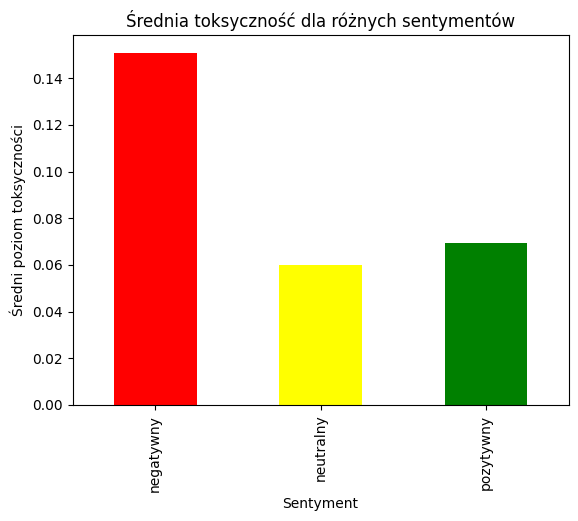

In [4]:

# Zbadanie korelacji między sentymentem a toksycznością
sentiment_toxicity = data.groupby('sentiment')['target'].mean()

# Wykres korelacji sentymentu a toksyczności
sentiment_toxicity.plot(kind='bar', color=[ 'red', 'yellow', 'green'])
plt.title('Średnia toksyczność dla różnych sentymentów')
plt.ylabel('Średni poziom toksyczności')
plt.xlabel('Sentyment')
plt.show()


## Przykład: Analiza słownictwa w książkach

Zadaniem jest przeanalizowanie dwóch książek – "Anna Karenina" i "Jane Eyre" – pod kątem najczęściej występujących słów. Odfiltruj stop-słowa za pomocą biblioteki NLTK i porównaj słowa najczęściej pojawiające się w obu książkach. 



In [5]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("")

[nltk_data] Error loading : Package '' not found in index


False

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KamilSarzyniak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KamilSarzyniak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KamilSarzyniak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


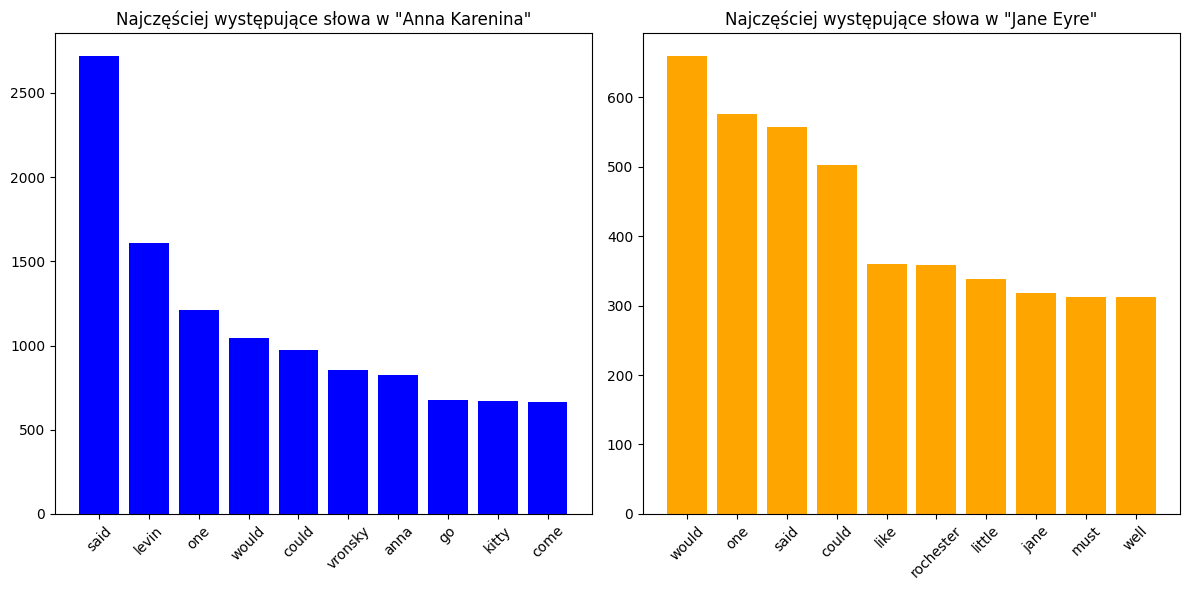

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Wczytanie danych
with open('anna_karenina.txt', 'r', encoding='utf-8') as f:
    anna_text = f.read()

with open('jane_eyre.txt', 'r', encoding='utf-8') as f:
    jane_text = f.read()

# Tokenizacja słów
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
anna_words = [word.lower() for word in word_tokenize(anna_text) if word.isalpha() and word.lower() not in stop_words]
jane_words = [word.lower() for word in word_tokenize(jane_text) if word.isalpha() and word.lower() not in stop_words]

# Częstość występowania słów
anna_freq = Counter(anna_words)
jane_freq = Counter(jane_words)

# Najczęściej występujące słowa
anna_common = anna_freq.most_common(10)
jane_common = jane_freq.most_common(10)

# Wykresy najczęściej występujących słów
anna_df = pd.DataFrame(anna_common, columns=['Word', 'Frequency'])
jane_df = pd.DataFrame(jane_common, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(anna_df['Word'], anna_df['Frequency'], color='blue')
plt.title('Najczęściej występujące słowa w "Anna Karenina"')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(jane_df['Word'], jane_df['Frequency'], color='orange')
plt.title('Najczęściej występujące słowa w "Jane Eyre"')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Zadania – Komentarze (plik `train.csv`)

### Zadanie 1: Klasyfikacja komentarzy na podstawie słów kluczowych
Stwórz klasyfikację komentarzy na podstawie słów kluczowych (neutralny, obraźliwy, atak na tożsamość). Zidentyfikuj powiązania między słowami kluczowymi a kategoriami toksyczności.

### Zadanie 2: Analiza długości zdań i ich wpływ na toksyczność
Oblicz średnią długość zdań w komentarzach i sprawdź korelację między długością komentarza a jego toksycznością.

# Zadania – Książki (pliki `anna_karenina.txt` i `jane_eyre.txt`)

### Zadanie 3: Ekstrakcja bigramów i trigramów w obu książkach
Wyekstrahuj i porównaj bigramy i trigramy z obu książek. Zidentyfikuj charakterystyczne frazy dla każdej z książek.

### Zadanie 4: Analiza stylu narracji na podstawie długości zdań i struktury gramatycznej
Oblicz średnią długość zdań oraz przeanalizuj struktury gramatyczne w obu książkach. Porównaj złożoność zdań i częstotliwość użycia różnych części mowy.


In [7]:
#ZAD1

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# Wczytanie danych
data = pd.read_csv('sample.csv')

# Inicjalizacja analizatora sentymentu
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KamilSarzyniak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# Funkcja do analizy sentymentu
def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'pozytywny'
    elif sentiment_score['compound'] <= -0.05:
        return 'negatywny'
    else:
        return 'neutralny'

In [9]:
# Analiza sentymentu dla każdego komentarza
data['sentiment'] = data['comment_text'].apply(analyze_sentiment)

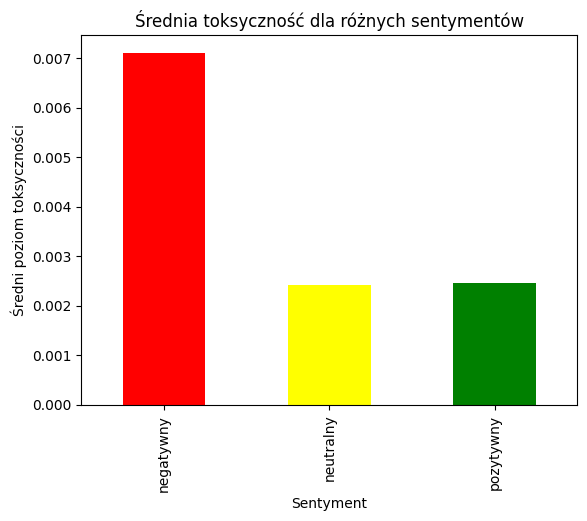

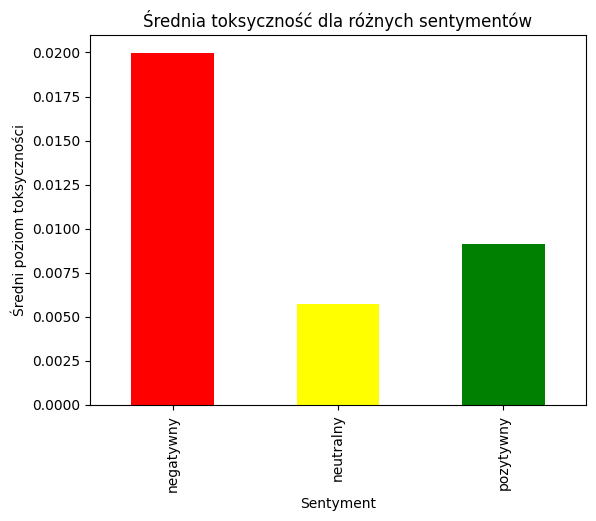

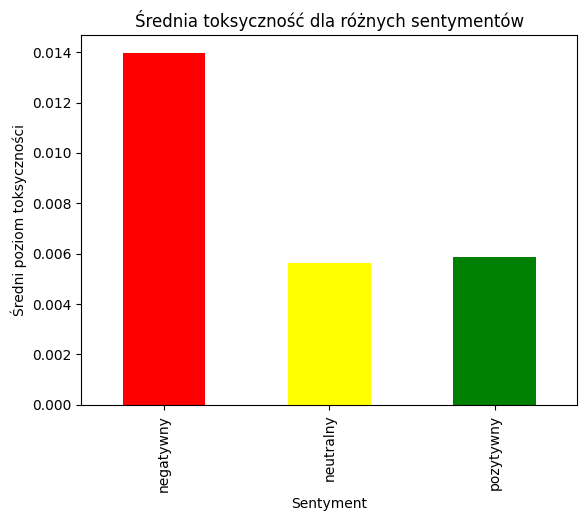

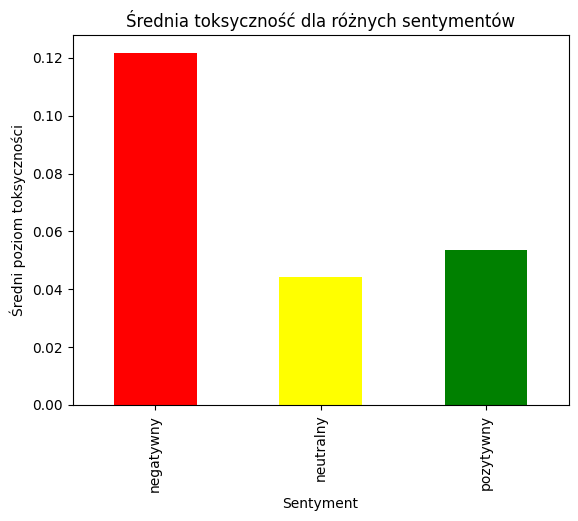

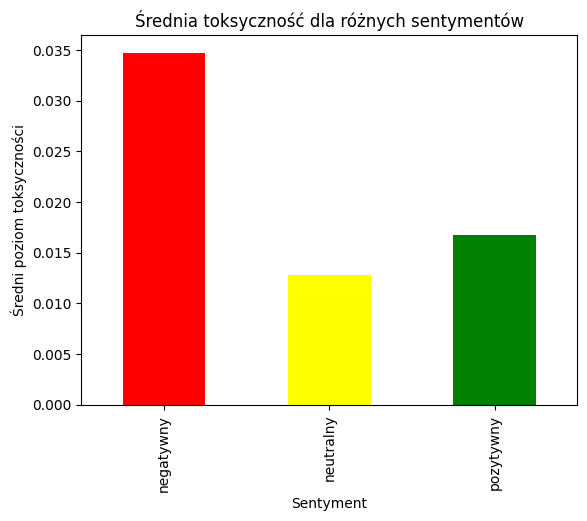

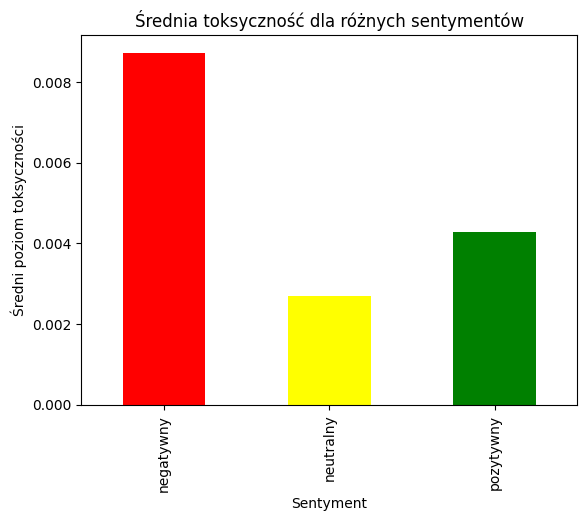

In [10]:
# Zbadanie korelacji między sentymentem a toksycznością
list = ['severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit']

for i in list:
    sentiment_toxicity = data.groupby('sentiment')[i].mean()

    # Wykres korelacji sentymentu a toksyczności
    sentiment_toxicity.plot(kind='bar', color=[ 'red', 'yellow', 'green'])
    plt.title('Średnia toksyczność dla różnych sentymentów')
    plt.ylabel('Średni poziom toksyczności')
    plt.xlabel('Sentyment')
    plt.show()

In [36]:
#ZAD2

from nltk.tokenize import sent_tokenize, word_tokenize

def calculate_sentence_length(text):
    sentences = sent_tokenize(text)
    total_words = sum(len(word_tokenize(sentence)) for sentence in sentences)
    return total_words

In [34]:
# Analiza sentymentu dla każdego komentarza
data['sentence_length'] = data['comment_text'].apply(calculate_sentence_length)

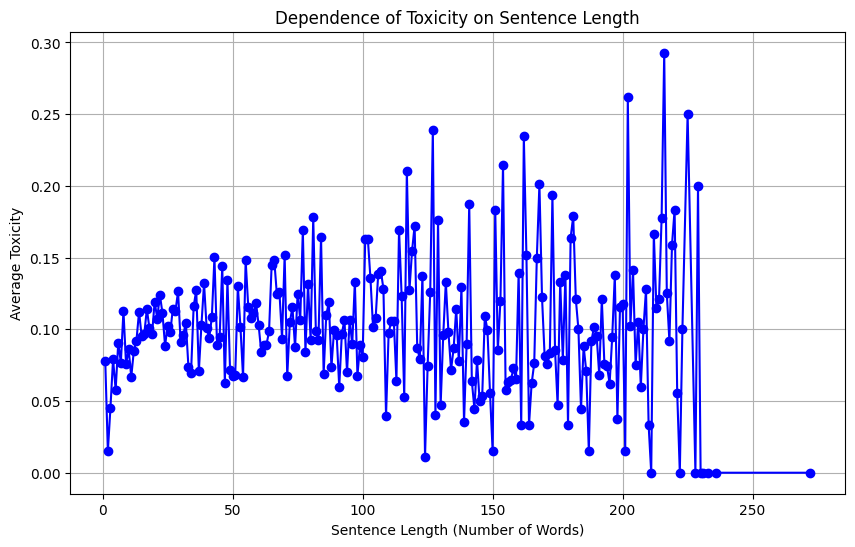

In [38]:
length_toxicity = data.groupby('sentence_length')['target'].mean()

# Wykres zależności długości zdania od toksyczności
plt.figure(figsize=(10,6))
plt.plot(length_toxicity.index, length_toxicity.values, marker='o', linestyle='-', color='b')
plt.title('Dependence of Toxicity on Sentence Length')
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Average Toxicity')
plt.grid(True)
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KamilSarzyniak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KamilSarzyniak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


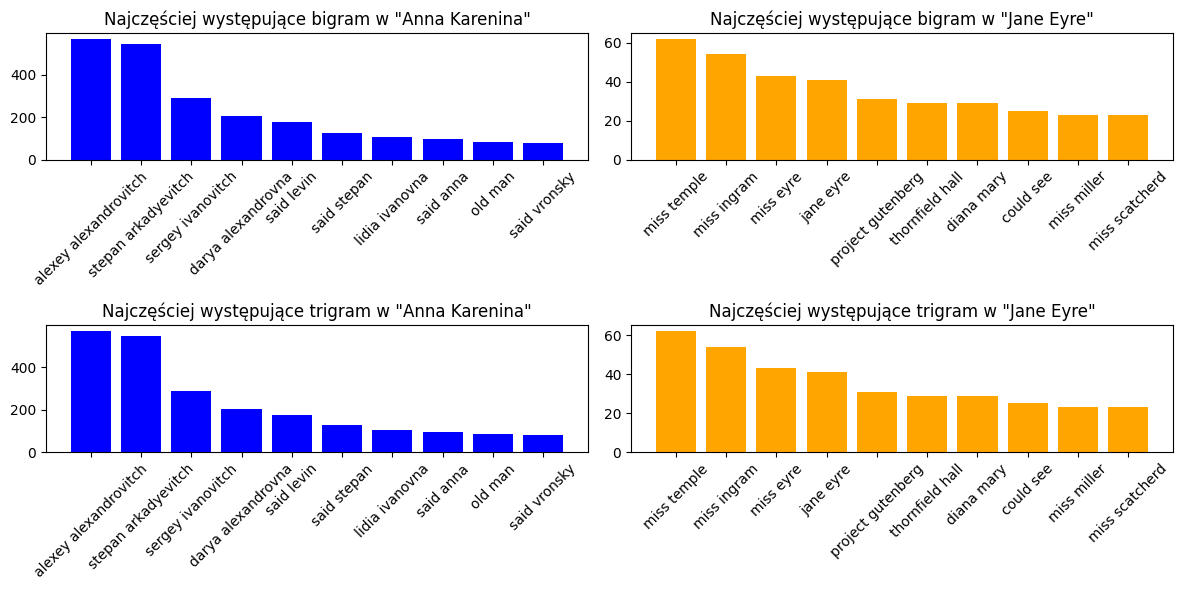

In [9]:
# ZAD3

from nltk.corpus import stopwords
from nltk.util import bigrams, trigrams
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Wczytanie danych
with open('anna_karenina.txt', 'r', encoding='utf-8') as f:
    anna_text = f.read()

with open('jane_eyre.txt', 'r', encoding='utf-8') as f:
    jane_text = f.read()

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
anna_words = [word.lower() for word in word_tokenize(anna_text) if word.isalpha() and word.lower() not in stop_words]
jane_words = [word.lower() for word in word_tokenize(jane_text) if word.isalpha() and word.lower() not in stop_words]

bigrams_anna = list(bigrams(anna_words))
bigrams_jane = list(bigrams(jane_words))

trigrams_anna = list(trigrams(anna_words))
trigrams_jane = list(trigrams(jane_words))

bigrams_anna_freq = Counter(bigrams_anna)
bigrams_jane_freq = Counter(bigrams_jane)

trigrams_anna_freq = Counter(trigrams_anna)
trigrams_jane_freq = Counter(trigrams_jane)

bigrams_anna_common = anna_freq.most_common(10)
bigrams_jane_common = jane_freq.most_common(10)

trigrams_anna_common = anna_freq.most_common(10)
trigrams_jane_common = jane_freq.most_common(10)

bigrams_anna_df = pd.DataFrame(bigrams_anna_common, columns=['Bigram', 'Frequency'])
bigrams_jane_df = pd.DataFrame(bigrams_jane_common, columns=['Bigram', 'Frequency'])

trigrams_anna_df = pd.DataFrame(trigrams_anna_common, columns=['Trigram', 'Frequency'])
trigrams_jane_df = pd.DataFrame(trigrams_jane_common, columns=['Trigram', 'Frequency'])

bigrams_anna_df['Bigram'] = bigrams_anna_df['Bigram'].apply(lambda x: ' '.join(x))
bigrams_jane_df['Bigram'] = bigrams_jane_df['Bigram'].apply(lambda x: ' '.join(x))

trigrams_anna_df['Trigram'] = trigrams_anna_df['Trigram'].apply(lambda x: ' '.join(x))
trigrams_jane_df['Trigram'] = trigrams_jane_df['Trigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(bigrams_anna_df['Bigram'], bigrams_anna_df['Frequency'], color='blue')
plt.title('Najczęściej występujące bigram w "Anna Karenina"')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(bigrams_jane_df['Bigram'], bigrams_jane_df['Frequency'], color='orange')
plt.title('Najczęściej występujące bigram w "Jane Eyre"')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(trigrams_anna_df['Trigram'], trigrams_anna_df['Frequency'], color='blue')
plt.title('Najczęściej występujące trigram w "Anna Karenina"')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(trigrams_jane_df['Trigram'], trigrams_jane_df['Frequency'], color='orange')
plt.title('Najczęściej występujące trigram w "Jane Eyre"')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Średnia długość zdania w "Anna Karenina": 25.65
Średnia długość zdania w "Jane Eyre": 32.78
Anna Karenina POS tags: Counter({'NN': 55126, 'IN': 43884, 'PRP': 33819, ',': 31139, 'DT': 31119, 'VBD': 29643, 'JJ': 24457, 'NNP': 23617, 'RB': 21985, '.': 19185, 'CC': 17397, 'VB': 15663, 'PRP$': 11601, 'NNS': 11144, 'TO': 10197, 'VBG': 9705, 'VBN': 8418, 'VBP': 7078, 'MD': 4728, 'VBZ': 4674, 'WP': 2784, ':': 2443, 'WRB': 2427, 'RP': 2154, 'CD': 2109, 'WDT': 1834, 'EX': 938, 'JJR': 806, 'PDT': 790, 'RBR': 617, 'UH': 609, 'JJS': 520, 'FW': 286, "''": 245, 'RBS': 173, '(': 159, ')': 159, 'NNPS': 62, 'WP$': 47, 'POS': 7, '$': 2, '#': 1})
Jane Eyre POS tags: Counter({'NN': 30342, 'IN': 20757, 'PRP': 20442, 'DT': 16497, ',': 14679, 'JJ': 14003, 'VBD': 13801, 'RB': 11438, 'NNP': 10899, 'CC': 9003, 'VB': 8852, '.': 8333, ':': 6283, 'PRP$': 6070, 'NNS': 5943, 'TO': 5172, 'VBN': 4840, 'VBP': 4590, 'MD': 3310, 'VBG': 2868, 'VBZ': 2735, 'WRB': 1106, 'CD': 1059, 'WP': 1038, 'WDT': 818, 'RP': 794, 'JJR': 4

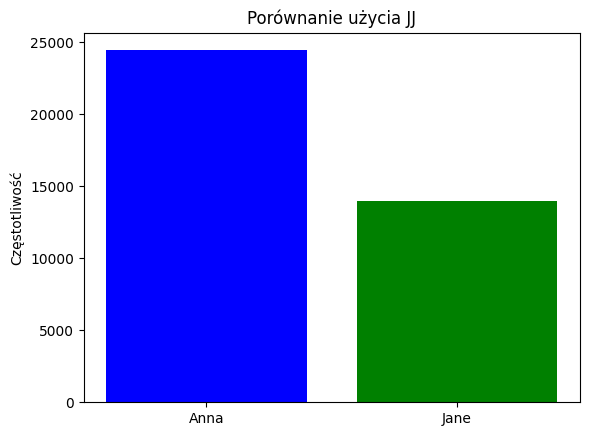

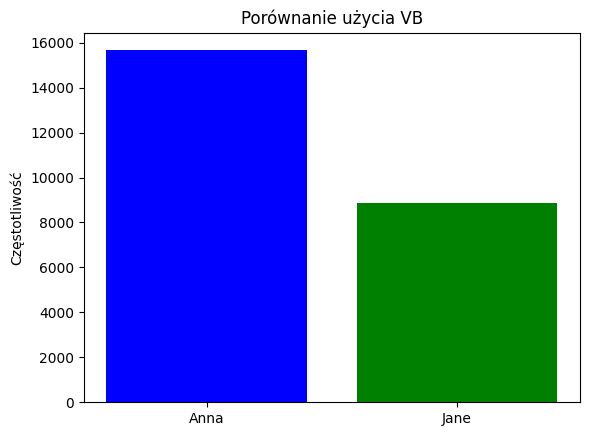

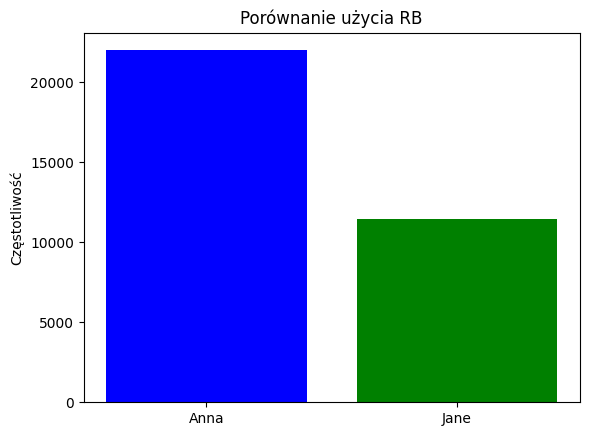

In [14]:
#ZAD4

from nltk.corpus import stopwords
from nltk.util import bigrams, trigrams
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Wczytanie danych
with open('anna_karenina.txt', 'r', encoding='utf-8') as f:
    anna_text = f.read()

with open('jane_eyre.txt', 'r', encoding='utf-8') as f:
    jane_text = f.read()

anna_sentences = sent_tokenize(anna_text)
jane_sentences = sent_tokenize(jane_text)

def average_sentence_length(sentences):
    total_words = sum(len(word_tokenize(sentence)) for sentence in sentences)
    return total_words / len(sentences)

anna_avg_sentence_length = average_sentence_length(anna_sentences)
jane_avg_sentence_length = average_sentence_length(jane_sentences)

print(f'Średnia długość zdania w "Anna Karenina": {anna_avg_sentence_length:.2f}')
print(f'Średnia długość zdania w "Jane Eyre": {jane_avg_sentence_length:.2f}')


def pos_tagging(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

anna_pos_tags = pos_tagging(anna_text)
jane_pos_tags = pos_tagging(jane_text)

anna_pos_freq = Counter(tag for word, tag in anna_pos_tags)
jane_pos_freq = Counter(tag for word, tag in jane_pos_tags)

print('Anna Karenina POS tags:', anna_pos_freq)
print('Jane Eyre POS tags:', jane_pos_freq)

def plot_pos_comparison(tag, anna_freq, jane_freq):
    labels = ['Anna', 'Jane']
    counts = [anna_freq.get(tag, 0), jane_freq.get(tag, 0)]
    
    plt.bar(labels, counts, color=['blue', 'green'])
    plt.title(f'Porównanie użycia {tag}')
    plt.ylabel('Częstotliwość')
    plt.show()

plot_pos_comparison('JJ', anna_pos_freq, jane_pos_freq)
plot_pos_comparison('VB', anna_pos_freq, jane_pos_freq)
plot_pos_comparison('RB', anna_pos_freq, jane_pos_freq) 